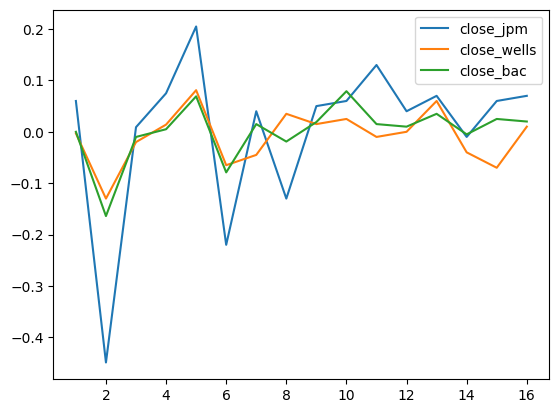

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for JPM
data_jpm = {
    'date_time': [
        '2017-11-17 15:35:17', '2017-11-17 15:40:04', '2017-11-17 15:45:01',
        '2017-11-17 15:50:55', '2017-11-17 15:55:00', '2017-11-17 16:00:30',
        '2017-11-17 16:05:07', '2017-11-17 16:10:08', '2017-11-17 16:15:11',
        '2017-11-17 16:20:29', '2017-11-17 16:25:25', '2017-11-17 16:30:53',
        '2017-11-17 16:35:11', '2017-11-17 16:40:44', '2017-11-17 16:45:52',
        '2017-11-17 16:50:37', '2017-11-17 16:55:02'
    ],
    'close': [
        98.120, 98.180, 97.731, 97.740, 97.815, 98.020,
        97.800, 97.840, 97.710, 97.760, 97.820, 97.950,
        97.990, 98.060, 98.050, 98.110, 98.180
    ]
}

# Data for Wells Fargo
data_wells = {
    'date_time': [
        '2017-11-17 15:35:08', '2017-11-17 15:40:00', '2017-11-17 15:45:32',
        '2017-11-17 15:50:07', '2017-11-17 15:55:00', '2017-11-17 16:00:30',
        '2017-11-17 16:05:52', '2017-11-17 16:10:22', '2017-11-17 16:15:43',
        '2017-11-17 16:20:07', '2017-11-17 16:25:13', '2017-11-17 16:30:04',
        '2017-11-17 16:35:32', '2017-11-17 16:40:09', '2017-11-17 16:45:24',
        '2017-11-17 16:50:28', '2017-11-17 16:55:42'
    ],
    'close': [
        54.323, 54.320, 54.190, 54.170, 54.184, 54.265,
        54.200, 54.155, 54.190, 54.205, 54.230, 54.220,
        54.220, 54.280, 54.240, 54.170, 54.180
    ]
}

# Data for BAC
data_bac = {
    'date_time': [
        '2017-11-17 15:35:17', '2017-11-17 15:40:06', '2017-11-17 15:45:05',
        '2017-11-17 15:50:07', '2017-11-17 15:55:00', '2017-11-17 16:00:30',
        '2017-11-17 16:05:20', '2017-11-17 16:10:05', '2017-11-17 16:15:07',
        '2017-11-17 16:20:29', '2017-11-17 16:25:00', '2017-11-17 16:30:18',
        '2017-11-17 16:35:08', '2017-11-17 16:40:46', '2017-11-17 16:45:55',
        '2017-11-17 16:50:05', '2017-11-17 16:55:02'
    ],
    'close': [
        26.552, 26.552, 26.388, 26.378, 26.383, 26.452,
        26.373, 26.388, 26.369, 26.388, 26.467, 26.482,
        26.492, 26.527, 26.522, 26.547, 26.567
    ]
}

# Creating DataFrames
jpm = pd.DataFrame(data_jpm)
wells = pd.DataFrame(data_wells)
bac = pd.DataFrame(data_bac)

# Convert date_time columns to datetime format
jpm['date_time'] = pd.to_datetime(jpm['date_time'])
wells['date_time'] = pd.to_datetime(wells['date_time'])
bac['date_time'] = pd.to_datetime(bac['date_time'])

# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', direction='nearest', suffixes=('', '_wells'))

# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', direction='nearest', suffixes=('_jpm', '_bac'))

# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()


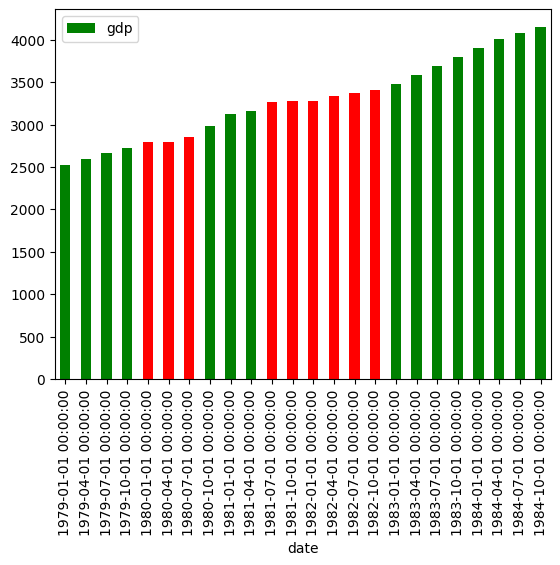

In [5]:
import pandas as pd

data_gdp = {
    'date': [
        '1979-01-01', '1979-04-01', '1979-07-01', '1979-10-01', '1980-01-01', '1980-04-01',
        '1980-07-01', '1980-10-01', '1981-01-01', '1981-04-01', '1981-07-01', '1981-10-01',
        '1982-01-01', '1982-04-01', '1982-07-01', '1982-10-01', '1983-01-01', '1983-04-01',
        '1983-07-01', '1983-10-01', '1984-01-01', '1984-04-01', '1984-07-01', '1984-10-01'
    ],
    'gdp': [
        2526.610, 2591.247, 2667.565, 2723.883, 2789.842, 2797.352,
        2856.483, 2985.557, 3124.206, 3162.532, 3260.609, 3280.818,
        3274.302, 3331.972, 3366.322, 3402.561, 3473.413, 3578.848,
        3689.179, 3794.706, 3908.054, 4009.601, 4084.250, 4148.551
    ]
}

data_recession = {
    'date': [
        '1980-01-01', '1980-08-01', '1981-07-01', '1982-12-01', '1990-07-01',
        '1991-04-01', '2001-03-01', '2001-12-01', '2007-12-01', '2009-07-01'
    ],
    'econ_status': [
        'recession', 'normal', 'recession', 'normal', 'recession',
        'normal', 'recession', 'normal', 'recession', 'normal'
    ]
}

gdp = pd.DataFrame(data_gdp)
recession = pd.DataFrame(data_recession)

# Convert date columns to datetime format
gdp['date'] = pd.to_datetime(gdp['date'])
recession['date'] = pd.to_datetime(recession['date'])


# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on='date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()